In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")

In [99]:
df = df.dropna(subset=['Price'])

In [100]:
df.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

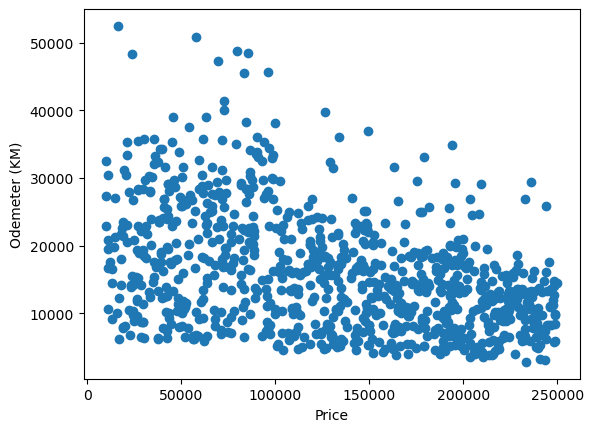

In [93]:
plt.scatter(df['Odometer (KM)'], df['Price'], label='Price to Odometer')
plt.xlabel('Price')
plt.ylabel('Odemeter (KM)')
plt.show()

In [94]:
for make in df['Make'].unique():
    average_price = df[df['Make'] == make]['Price'].mean()
    print(f'Average price for {make}: {average_price}')


Average price for Honda: 14618.661921708184
Average price for BMW: 26902.440860215054
Average price for Toyota: 15715.257062146893
Average price for Nissan: 13664.502857142857
Average price for nan: nan


In [110]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [123]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop('Price', axis=1)
y = df['Price']

num_attribs = ['Odometer (KM)', 'Doors']
num_df = df[num_attribs]

scaler = StandardScaler()

cat_attribs = ['Make', 'Colour']
cat_df = df[cat_attribs]

num_imputer = SimpleImputer(strategy='mean')
one_hot = OneHotEncoder()

preprocessor = ColumnTransformer([('cat_transformer', one_hot, cat_attribs),
                                  ('num_transformer', num_imputer, num_attribs)],
                                remainder='passthrough')

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()

pipeline = Pipeline([('preprocessor', preprocessor),
                    ('model', model)])


In [149]:
from sklearn.model_selection import GridSearchCV

param_grid = {'model__n_estimators': np.arange(1, 10, 1),
              'model__max_depth': np.arange(1, 10, 1),
              'model__min_samples_split': np.arange(2, 6, 1),
              'model__min_samples_leaf': np.arange(1, 5, 1)}

gs = GridSearchCV(pipeline, param_grid)

gs.fit(X, y)


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_transformer',
                                                                         OneHotEncoder(),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('num_transformer',
                                                                         SimpleImputer(),
                                                                         ['Odometer '
                                                                          '(KM)',
                                                                          'Doors'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 2, 3, 4]),
                         'model__min_samples_split': array([2, 3, 4, 5]),
                         'model__n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [152]:
gs.best_params_

{'model__max_depth': 3,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 4,
 'model__n_estimators': 3}

In [156]:
cv_results = gs.cv_results_

In [159]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__max_depth', 'param_model__min_samples_leaf', 'param_model__min_samples_split', 'param_model__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [166]:
print(np.mean(gs.cv_results_['mean_test_score']))

0.2732519066301254
